# Setup & Import Libraries

In [30]:
!pip install Jinja2 -q
!pip install pycaret -q
!pip install ipympl -q
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3 -q

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
     |████████████████████████████████| 13.1 MB 4.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.

In [11]:
import pycaret

In [24]:
import os
import numpy as np
import pandas as pd
import pycaret
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from scipy.stats import kurtosis
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipympl
%matplotlib inline

# Load Dataset

In [21]:
df = pd.read_csv("data.csv", sep=';', header=0)

df.head()

,idnr,b1,b2,b3,b4,c1,c2,c3,c4,c5,...,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37
0,1,0,b982aebe4b85,306,2698,0,0,7e8b1406d903,0.0,0.0,...,1.00,7e8b1406d903,0.00,0,0.00,0.0,0.0,0.0,0,255
1,2,0,615d2eb5810a,105,145,0,0,7e8b1406d903,0.0,0.0,...,0.86,7e8b1406d903,0.00,0,0.01,0.0,0.0,0.0,0,115
2,3,0,b982aebe4b85,197,9287,0,0,7e8b1406d903,0.0,0.0,...,1.00,7e8b1406d903,0.00,0,0.00,0.0,0.0,0.0,0,255
3,4,0,b982aebe4b85,247,1581,0,0,7e8b1406d903,0.0,0.0,...,1.00,7e8b1406d903,0.03,0,0.20,0.0,0.0,0.0,0,5
4,5,0,b982aebe4b85,233,1120,0,0,7e8b1406d903,0.0,0.0,...,1.00,7e8b1406d903,0.04,0,0.01,0.0,0.0,0.0,0,68


# Exploratory Data Analysis - EDA

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78764 entries, 0 to 78763
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   idnr    78764 non-null  int64  
 1   b1      78764 non-null  int64  
 2   b2      78764 non-null  object 
 3   b3      78764 non-null  int64  
 4   b4      78764 non-null  int64  
 5   c1      78764 non-null  int64  
 6   c2      78764 non-null  int64  
 7   c3      78764 non-null  object 
 8   c4      78764 non-null  float64
 9   c5      78764 non-null  float64
 10  c6      78764 non-null  int64  
 11  c7      78764 non-null  float64
 12  c8      78764 non-null  float64
 13  c9      78764 non-null  object 
 14  c10     78764 non-null  float64
 15  c11     78764 non-null  float64
 16  c12     78764 non-null  float64
 17  c13     78764 non-null  int64  
 18  c14     78764 non-null  int64  
 19  c15     78764 non-null  object 
 20  c16     78764 non-null  int64  
 21  c17     78764 non-null  int64  
 22

In [22]:
df.describe()

,idnr,b1,b3,b4,c1,c2,c4,c5,c6,c7,...,c27,c28,c30,c31,c32,c33,c34,c35,c36,c37
count,78764.000000,78764.000000,7.876400e+04,7.876400e+04,78764.000000,78764.000000,78764.000000,78764.000000,78764.0,78764.000000,...,78764.000000,78764.000000,78764.000000,78764.000000,78764.000000,78764.000000,78764.000000,78764.000000,78764.000000,78764.000000
mean,39382.500000,221.334506,4.212667e+03,4.081650e+03,0.005853,0.057641,0.057039,0.055584,0.0,0.985690,...,0.126555,0.844032,0.024944,0.000089,0.139964,0.001912,0.055261,0.018022,0.030941,147.690798
std,22737.352638,1379.419351,1.306736e+05,7.252236e+04,0.233825,4.893374,0.223525,0.226614,0.0,0.091636,...,1.700752,0.306045,0.051542,0.013800,0.289011,0.028438,0.227704,0.115842,4.374954,103.717580
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19691.750000,0.000000,1.470000e+02,1.310000e+02,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000
50%,39382.500000,0.000000,2.320000e+02,4.150000e+02,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,1.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,158.000000
75%,59073.250000,0.000000,3.150000e+02,2.126000e+03,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,1.000000,0.030000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,255.000000
max,78764.000000,58329.000000,5.135678e+06,5.155468e+06,28.000000,993.000000,1.000000,1.000000,0.0,1.000000,...,30.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,884.000000,255.000000


**Visualize behavioural features**

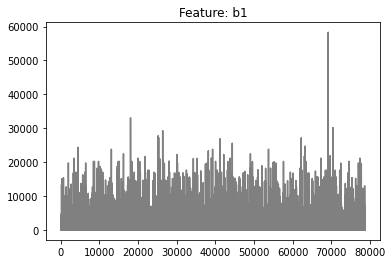

In [34]:
plt.plot(df["b1"], color="grey")
plt.title("Feature: b1")
plt.show()

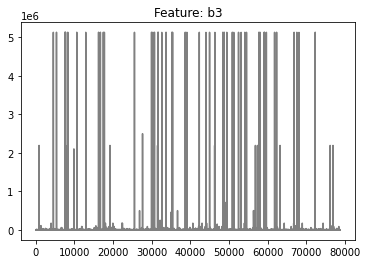

In [37]:
plt.plot(df["b3"], color="grey")
plt.title("Feature: b3")
plt.show()

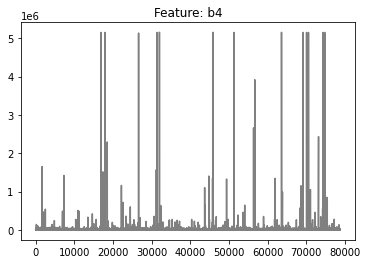

In [38]:
plt.plot(df["b4"], color="grey")
plt.title("Feature: b4")
plt.show()

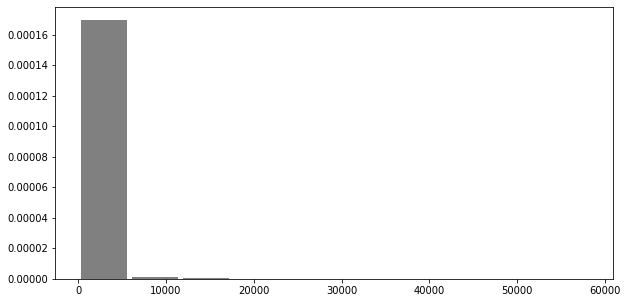

In [49]:
plt.figure(figsize=(10,5))
plt.hist(df.b1, color="grey", density=True, rwidth=0.9)
plt.show()

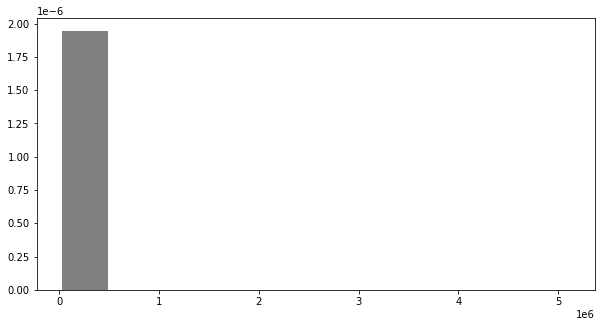

In [50]:
plt.figure(figsize=(10,5))
plt.hist(df.b3, color="grey", density=True, rwidth=0.9)
plt.show()

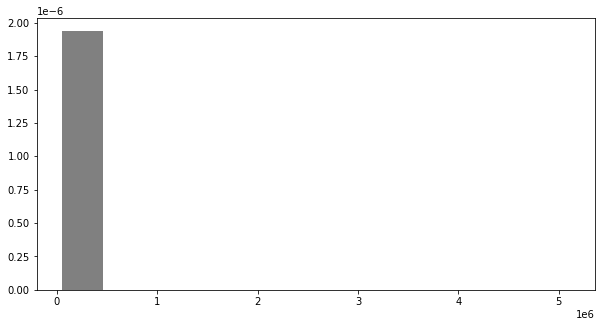

In [52]:
plt.figure(figsize=(10,5))
plt.hist(df.b4, color="grey", density=True, rwidth=0.8)
plt.show()

In [ ]:
sns.pairplot(df[["b1", "b3", "b4"]], hue=None, hue_order=None,
             palette=None, vars=None, x_vars=None, y_vars=None, 
             kind="scatter", diag_kind="auto", markers=None)
plt.show()